In [1]:
import numpy as np
import pandas as pd
import os
import nibabel as nib
import glob
import math
from nilearn.image import resample_img
from nilearn import plotting
get_ipython().magic(u'matplotlib inline')
import statistics
import math
import matplotlib.pyplot as plt


/packages/miniconda/20190102/envs/anaconda-tensorflow-gpu/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
cd /projects/hulacon/shared/neu_data/AVFP 


/gpfs/projects/hulacon/shared/neu_data/AVFP


In [3]:
#loop through a subset of mask number range
# mask_range = range(0,int(np.max(full_mask)))
mask_range = range(1,2)

#atlas directory
# mask_fs = ['/home/chendanl/roi/HarvardOxford/HarvardOxford-cort-maxprob-thr25-1mm.nii.gz', '/home/chendanl/roi/HarvardOxford/HarvardOxford-sub-maxprob-thr25-1mm.nii.gz']
# mask_label_fs = ['/home/chendanl/roi/HarvardOxford/HarvardOxford-cort-labels.csv', '/home/chendanl/roi/HarvardOxford/HarvardOxford-sub-labels.csv']
mask_fs = ['/home/chendanl/roi/HarvardOxford/HarvardOxford-cort-maxprob-thr25-1mm.nii.gz']
mask_label_fs = ['/home/chendanl/roi/HarvardOxford/HarvardOxford-cort-labels.csv']
# mask_fs = ['/home/chendanl/roi/HarvardOxford/HarvardOxford-sub-maxprob-thr25-1mm.nii.gz']
# mask_label_fs = ['/home/chendanl/roi/HarvardOxford/HarvardOxford-sub-labels.csv']


In [4]:
logfile_folder = 'AVFP_logfiles_new'
data_folder = 'AVFP_NTFA_data'
data_suffix = '_AVFP_denoised_novideoregs'
log_header = ['Video_name', 'video_number', 'video_category(1-H 2-SO 3-SP)', 'novel_vs_familiar(1-N,2-Old)', 'run_number', 'video_onset', 'video_offset', 'video_duration_method1', 'video_duration_method2', 'Fear_rating_onset', 'fear_rating', 'fear_rating_RT', 'Arousal_rating_onset', 'arousal_rating', 'arousal_rating_RT', 'Valence_rating_onset', 'valence_rating', 'valence_rating_RT']
#get subject name from log file names
subj_dir = ['sub_'+i.split('/')[-2] for i in glob.glob(data_folder+'/*/*_run-1'+data_suffix+'.nii.gz')]
subj_dir.sort()
print(len(subj_dir))
save_dir = '/projects/hulacon/shared/neu_data/AVFP/ISECmem_RSA_ROI_analysis'+data_suffix

TR=0.8
num_TR = 600 #per run
TR_series = [x*0.8 for x in range(0, num_TR)]
TR_BOLD_offset = 7
##get timing info
# subj=subj_dir[1]
# subj_log_f = glob.glob(os.path.join(logfile_folder,'AffVidsMem*'+subj+'.txt'))[0]
# subj_log = pd.read_table(subj_log_f, sep=' ', header=None, names = log_header, index_col=False)
# #mean video TR duration
# video_duration = np.mean(subj_log['video_duration_method2'])
# #mean of first two ratings TR duration in TR
# rating_duration = np.mean([np.mean(subj_log['Arousal_rating_onset']-subj_log['video_offset']), np.mean(subj_log['Valence_rating_onset']-subj_log['Arousal_rating_onset'])])
# #mean of tiral duations in TR and mean of ITI in TR
# duration=[]
# ITI=[]
# for start_n,start in enumerate(subj_log['video_onset'][:-1].tolist()):
#     duration.append(subj_log['video_onset'].tolist()[start_n+1] - start)
#     ITI.append(subj_log['video_onset'].tolist()[start_n+1] - (start+video_duration+(rating_duration*3)))
# trial_duration = np.mean([i for i in duration if i >0])
# ITI_duration=np.mean([i for i in ITI if i >0])
TR_video_duration = 26 #video_duration/0.8=25.6 round to 26
TR_mean_rating= 5.3*3 #rating_duration/0.8=5.3 
TR_mean_mean_ITI = 6 #ITI_duration/0.8=5.8 round to 6
TR_trial_end = TR_video_duration+TR_mean_rating+TR_mean_mean_ITI
TR_mean_trial_duration = 60 #TR_mean_mean_ITI+TR_video_duration+TR_mean_rating+TR_mean_mean_ITI =53.9 round to 55
num_vid = pd.read_table(glob.glob(os.path.join(logfile_folder,'AffVidsMem*'+subj_dir[0]+'.txt'))[0], sep=' ', header=None, names = log_header, index_col=False).shape[0]

#sample subj data img for resampling
subj_data_img = nib.load(glob.glob(os.path.join(data_folder,subj_dir[0][-3:],'sub-'+subj_dir[0][-3:]+'_run-1'+data_suffix+'.nii.gz'))[0])

#find the index of the closest number to K in a list
def closest(lst, K): 
    val = lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))] 
    idx = lst.index(val)
    return idx

#use index of finding value x in 2D array (b) of value x as index of the first 2 dimensions for 3D array (a)
def select3Dfrom2D(a,b,x):
    b=old_vid.astype(int)
    
    new_array = []
    for dim1 in list(set(np.where(b==x)[0])):
        new_array.append(a[dim1,np.where(b==x)[1][np.where(b==x)[0]==dim1],:])
    new_array = np.array(new_array)
    
    return new_array


67


In [5]:
# #motion exclusion subject and run
# motion_exclusion = pd.read_csv('/home/chendanl/wrkdir/exclude_motion_subjects.csv')
# motion_exclusion = motion_exclusion[motion_exclusion['run']<3] #we only care about the first two runs


insular_cortex


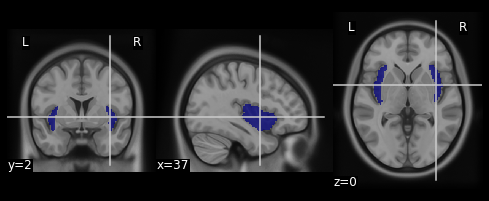

subj0, subj1, subj2, subj3, subj4, subj5, subj6, subj7, subj8, subj9, subj10, subj11, subj12, subj13, subj14, subj15, subj16, subj17, subj18, subj19, subj20, subj21, subj22, subj23, subj24, subj25, subj26, subj27, subj28, subj29, subj30, subj31, subj32, subj33, subj34, subj35, subj36, subj37, subj38, subj39, subj40, subj41, subj42, subj43, subj44, subj45, subj46, subj47, subj48, subj49, subj50, subj51, subj52, subj53, subj54, subj55, subj56, subj57, subj58, subj59, subj60, subj61, subj62, subj63, subj64, subj65, subj66, 

In [6]:
######################################################################
#loop mask
######################################################################
#THIS SCRIPT GRABS AVERAGED TIME COURSE IN EACH ROI FROM THE START OF THE VIDEO ONSET AND 60 TRS AFTERWARDS. CAN BE TRIMMED DOWN FROM PLOTTING SCRIPT
for mask_n, mask_f in enumerate(mask_fs):
    atlas_img = nib.load(mask_f)
    full_mask = atlas_img.get_fdata()
    num_regions = list(range(1,int(np.max(full_mask))+1))
    mask_labels = pd.read_table(mask_label_fs[mask_n], sep=',', header=None, names = ['index','region_name'], index_col=False)

    for mask_num in mask_range:
        atlas_img = nib.load(mask_f)
        mask = atlas_img.get_fdata()
        mask[mask!=int(mask_labels['index'][mask_num])]=0
        mask[mask!=0]=1
        mask_img = nib.Nifti1Image(mask, atlas_img.affine, atlas_img.header)
        mask_label = mask_labels['region_name'][mask_num].replace(" ", "_")
        mask_label = mask_label.replace(",", "_")

        subfolder_name = str(mask_labels['index'][mask_num])+'_'+mask_label
        if not os.path.exists(os.path.join(save_dir,subfolder_name)):
            os.mkdir(os.path.join(save_dir,subfolder_name))
        print('\n'+mask_label)

        #resample mask data to subj data (easier than masking all the timecourse)
        mask_data_resampled = resample_img(mask_img,
                            target_affine=subj_data_img.affine,
                            target_shape=subj_data_img.shape[0:3],
                            interpolation='nearest')
        nib.save(mask_data_resampled, '/home/chendanl/wrkdir/roi_'+mask_label+'.nii.gz')
        display = plotting.plot_roi('/home/chendanl/wrkdir/roi_'+mask_label+'.nii.gz', bg_img='/home/chendanl/roi/mni_icbm152_t1_tal_nlin_sym_09b_hires.nii')
        display.savefig(os.path.join(save_dir,subfolder_name,subfolder_name+'_roi.png'))
        plotting.show()
        
        ######################################################################
        #loop through subject video data per run
        ######################################################################

        #initialize list for averaged acitivty in mask: subj x vid x TR
        vid_avg_activity = np.empty((len(subj_dir), num_vid, TR_mean_trial_duration))
        vid_avg_activity[:] = np.nan

        #initialize list for the final saved array: TR x num of voxels in ROI x vid x subj
        collapsed_TR_vox_vid_subj_array = np.empty((TR_mean_trial_duration, np.sum(mask_data_resampled.get_fdata()!=0), num_vid, len(subj_dir)), dtype=object)
        collapsed_TR_vox_vid_subj_array[:] = np.nan

        old_vid = np.empty((num_vid, len(subj_dir)), dtype=object)
        vid_name = np.empty((num_vid, len(subj_dir)), dtype=object)
        vid_validity = np.empty((num_vid, len(subj_dir)), dtype=object)
        
        for subj_num,subj in enumerate(subj_dir):
            print('subj'+str(subj_num)+ ', ', end = '')

            subj_log_f = glob.glob(os.path.join(logfile_folder,'AffVidsMem*'+subj+'.txt'))[0]
            subj_log = pd.read_table(subj_log_f, sep=' ', header=None, names = log_header, index_col=False)
#             #add num of TR to account for BOLD signal delay
#             #do NOT add this now. ADD IT BACK DURING PLOTTING.
#             subj_log['video_onset'] = subj_log['video_onset']+TR_BOLD_offset
#             subj_log['video_offset'] = subj_log['video_offset']+TR_BOLD_offset
#             subj_log['Fear_rating_onset'] = subj_log['Fear_rating_onset']+TR_BOLD_offset
#             subj_log['Arousal_rating_onset'] = subj_log['Arousal_rating_onset']+TR_BOLD_offset
#             subj_log['Valence_rating_onset'] = subj_log['Valence_rating_onset']+TR_BOLD_offset
                
            #run 1 data
            subj_run1_f = glob.glob(os.path.join(data_folder,subj[-3:],'sub-'+subj[-3:]+'_run-1'+data_suffix+'.nii.gz'))[0]
            subj_run1_img = nib.load(subj_run1_f)
            #run 1 rest data
            rest_mean_run1 = []
            for n in list(range(1,int(num_vid/2)-1)):
                #add TR offset to find time for ITI period
                rest_data = subj_run1_img.dataobj[:,:,:,closest(TR_series, (subj_log['Valence_rating_onset'][n]+TR_BOLD_offset+(TR_mean_rating/3)*TR)): closest(TR_series, subj_log['video_onset'][n+1]+TR_BOLD_offset)]
                temp_rest_mean =[]
                for i in range(rest_data.shape[3]):
                    temp_rest_mean.append(np.nanmean(rest_data[:,:,:,i][mask_data_resampled.get_fdata()!=0]))
                rest_mean_run1.append(np.nanmean(temp_rest_mean)) 
            rest_mean_run1 = np.nanmean(rest_mean_run1)

            #run 2 data
            subj_run2_f = glob.glob(os.path.join(data_folder,subj[-3:],'sub-'+subj[-3:]+'_run-2'+data_suffix+'.nii.gz'))[0]
            subj_run2_img = nib.load(subj_run2_f)
            #run 2 rest data
            rest_mean_run2 = []
            for n in list(range(int(num_vid/2)+1, num_vid-1)):
                #add TR offset to find time for ITI period
                rest_data = subj_run2_img.dataobj[:,:,:,closest(TR_series, (subj_log['Valence_rating_onset'][n]+TR_BOLD_offset+(TR_mean_rating/3)*TR)): closest(TR_series, subj_log['video_onset'][n+1]+TR_BOLD_offset)]
                temp_rest_mean =[]
                for i in range(rest_data.shape[3]):
                    temp_rest_mean.append(np.nanmean(rest_data[:,:,:,i][mask_data_resampled.get_fdata()!=0]))
                rest_mean_run2.append(np.nanmean(temp_rest_mean)) 
            rest_mean_run2 = np.nanmean(rest_mean_run2)

            for vid_num, vid in enumerate(subj_log['Video_name']):
#                 print('vid'+str(vid_num)+ ', ', end = '')

                ########## populate arrays about videos info #########
                #old/new info about each video
                if subj_log['novel_vs_familiar(1-N,2-Old)'][vid_num] == 2:
                    old_vid[vid_num, subj_num] = 1
                elif subj_log['novel_vs_familiar(1-N,2-Old)'][vid_num] == 1:
                    old_vid[vid_num, subj_num] = 0
                #naming/category info about each video
                vid_name[vid_num, subj_num]=subj_log['Video_name'][vid_num]
#                 #motion exclusion validity info about each video
#                 for discarded_run in list(motion_exclusion['run'][motion_exclusion['subjects']==int(subj[-3:])]):
#                     vid_validity[int((discarded_run-1)*num_vid/2): int((discarded_run)*num_vid/2), subj_num]=0
                #######################################################

                #get video TR start and end
                #chill out, TR_BOLD_offset wasn't added here because you added that at plotting. It is fine
                TR_begin = closest(TR_series, subj_log['video_onset'][vid_num])
                # TR_mean_trial_duration = math.ceil((subj_log['video_offset'][vid_num] - subj_log['video_onset'][vid_num])/TR)
                TR_end = TR_begin+TR_mean_trial_duration

                #get video data from nearest TR start
                if subj_log['run_number'][vid_num] == 1:
                    vid_data_baseline = subj_run1_img.dataobj[:,:,:,TR_begin:TR_end]-rest_mean_run1
                    #vid_data.shape
                elif subj_log['run_number'][vid_num] == 2:
                    vid_data_baseline = subj_run2_img.dataobj[:,:,:,TR_begin:TR_end]-rest_mean_run2
                    
                #in shape: TR x num of voxels in ROI x vid x subj
                collapsed_TR_vox_vid_subj_array[:,:,vid_num,subj_num]=np.transpose(vid_data_baseline[:,:,:,:][mask_data_resampled.get_fdata()!=0])
        
        np.save(os.path.join(save_dir,subfolder_name,subfolder_name+'_timecourse_collapsed_array.npy'), collapsed_TR_vox_vid_subj_array)

#         np.save(os.path.join(save_dir,'subj_video_info','subj_vid_novelty_array(1-O,0-N).npy'), old_vid)
#         np.save(os.path.join(save_dir,'subj_video_info','subj_vid_name_array.npy'), vid_name)
#         np.save(os.path.join(save_dir,'subj_video_info','subj_vid_validity_array.npy'), vid_validity)


In [7]:
check

NameError: name 'check' is not defined